<a href="https://colab.research.google.com/github/OsvaldoFloresC/OsvaldoFloresC/blob/main/InterLagrange_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

De acuerdo a la siguiente tabla calculamos el polinomio de interpolacion de Lagrange

\begin{array}{|c|c|}
x & y=f(x) \\
\hline
0 & 1 \\
1 & 2 \\
2 & 0 \\
3 & 2 \\
\end{array}
de acuerdo con el siguiete algoritmo \begin{equation} P(x) = \sum_{i=0}^{n} f(x_k) \cdot L_{n,k} (x) \end{equation} para cada $k = 0,1,2,...,n$, donde

 $$L_{n,k}(x)= \prod_{i=1 \ i \neq k}^{n} \frac{x-x_i}{x_k-x_i}$$

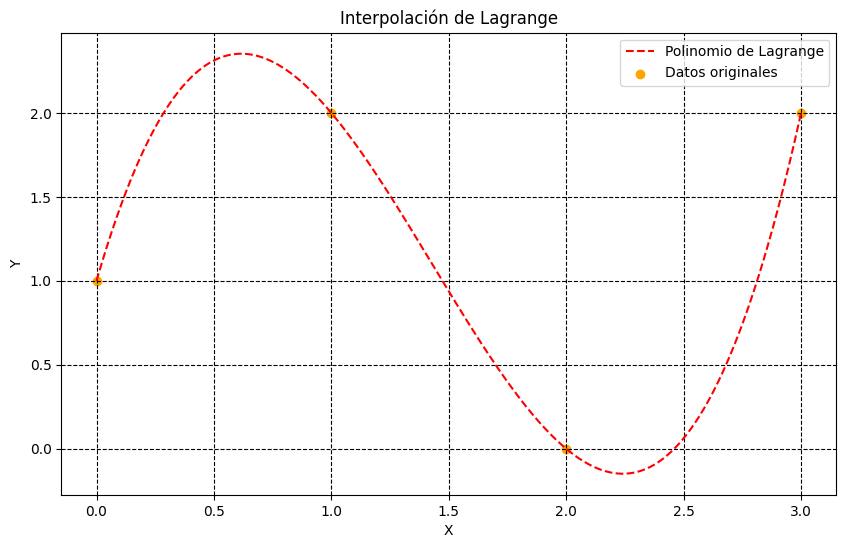

In [26]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función para calcular el polinomio de interpolación de Lagrange
def interpolacion_lagrange(x, y):

    # Definir la variable simbólica
    X = sp.symbols('X')

    # Inicializar el polinomio de Lagrange
    polinomio = 0

    # Calcular el polinomio de Lagrange
    n = len(x)
    for i in range(n):
        termino = y[i]
        for j in range(n):
            if j != i:
                termino *= (X - x[j]) / (x[i] - x[j])
        polinomio += termino

    # Simplificar el polinomio
    polinomio = sp.simplify(polinomio)
    return polinomio

# Función para graficar el polinomio de interpolación de Lagrange y los datos originales
def graficar_interpolacion(x, y, polinomio):

    # Convertir el polinomio simbólico a una función numérica
    polinomio_func = sp.lambdify(sp.symbols('X'), polinomio)

    # Generar puntos para la gráfica del polinomio
    x_polinomio = np.linspace(min(x), max(x), 1000)
    y_polinomio = polinomio_func(x_polinomio)

    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(x_polinomio, y_polinomio, label='Polinomio de Lagrange', color='red', linestyle='--')
    plt.scatter(x, y,  color="orange", marker='o', label='Datos originales')
    plt.title('Interpolación de Lagrange')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(color="black", linestyle="--")
    plt.grid(True)
    plt.show()

# Ejemplo de uso
x = [0, 1, 2, 3]
y = [1, 2, 0, 2]

# Calcular el polinomio de interpolación de Lagrange
polinomio = interpolacion_lagrange(x, y)

# Graficar el polinomio y los datos originales
graficar_interpolacion(x, y, polinomio)


por lo que utilizando la biblioteca Sympy tenemos que el polinomio de manera simplificada es:

In [28]:
sp.simplify(polinomio)

7*X**3/6 - 5*X**2 + 29*X/6 + 1

al evaluar el polinomio de la Lagrange en x=2 obtenemos 0

In [29]:
x=2
polinomio.subs(sp.symbols('X'),x)

0

Con lo cual corroboramos que los calculos se realizaron de forma correcta

El polinomio de interpolación de Lagrange es una técnica poderosa y versátil que permite interpolar datos y aproximar funciones de manera precisa. Su simplicidad y efectividad lo hacen una herramienta esencial en el análisis numérico y en muchas aplicaciones prácticas.